# 04. Timebanks: EDA
> Author: [Dawn Graham](https://dawngraham.github.io/)

Exploratory data analysis and visualization of `combined.csv` that will be used for modeling.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

## EDA

### Functions

In [2]:
# Get data summary
def get_summary(data):
    print(f'SHAPE:\n{data.shape}\n')
    print(f'NULL:\n{data.isnull().sum()}\n')
    print(f'UNIQUE:\n{data.nunique()}\n')

In [3]:
# Plot pairgrid with histograms, regression, and kde plots
def get_pairgrid(data):
    g = sns.PairGrid(data)
    g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
    g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
    g = g.map_diag(plt.hist)        # Histograms along diagonal.

    plt.show();

In [4]:
# Get boxplots
def get_boxplot(data_set):
    
    if data_set.shape[0] > 150:
        title = 'ALL Timebanks'
    elif data_set.shape[0] > 100:
        title = 'INACTIVE Timebanks'
    else:
        title = 'ACTIVE Timebanks'
    
    plt.figure(figsize = (data_set.shape[1]*4,8))
    sns.set(font_scale=1.4, font='Helvetica Neue')
    sns.boxplot(data=data_set, palette="Set2").set_title(title);

In [5]:
# Plot correlation heatmap with target value
def get_heatmap(data):
    plt.figure(figsize = (4,11))
    sns.set(font_scale=1.3, font='Helvetica Neue')
    sns.heatmap(data.corr()[['avg_daily_exchanges']].sort_values('avg_daily_exchanges', ascending=False), annot=True);

### Read in data

In [6]:
df = pd.read_csv('../data/combined_2019-01-24_2019-02-07.csv')
df.head()

,timebank,sponsor,phone,url_2,facebook,twitter,mission_word_count,mission_sentiment,notes_word_count,notes_sentiment,...,facebook_likes,facebook_followers,twitter_tweets,twitter_following,twitter_followers,categories_total,categories_parent,categories_with_offers,categories_with_requests,talent_per_cat_per_member
0,addington,1.0,1.0,0.0,1.0,0.0,320.0,0.9986,144.0,0.8943,...,169.0,172.0,0.0,0.0,0.0,89.0,11.0,0.325843,0.146067,0.391840
1,aha,0.0,1.0,0.0,0.0,0.0,20.0,0.7717,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,alticultura,1.0,1.0,0.0,0.0,0.0,12.0,0.0000,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,18.0,11.0,0.000000,0.000000,0.318182
3,andersoncommunity,1.0,1.0,0.0,0.0,0.0,20.0,0.6369,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,ate,1.0,1.0,1.0,1.0,0.0,11.0,0.4215,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,18.0,9.0,0.277778,0.000000,0.138889


In [7]:
# Get only numerical columns
data = df.loc[:, df.columns != 'timebank']

In [8]:
# Get data for active timebanks only
data_active = data[data['avg_daily_exchanges'] != 0]

# Get data for inactive timebanks only
data_inactive = data[data['avg_daily_exchanges'] == 0]

### Get summary info

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
get_summary(data)

SHAPE:
(156, 27)

NULL:
sponsor                      0
phone                        0
url_2                        0
facebook                     0
twitter                      0
mission_word_count           0
mission_sentiment            0
notes_word_count             0
notes_sentiment              0
avg_daily_exchanges          0
avg_daily_hours              0
hours_per_exchange           0
avg_offers                   0
avg_requests                 0
offer_request_ratio          0
members_starting             0
members_daily_new            0
facebook_likes               0
facebook_followers           0
twitter_tweets               0
twitter_following            0
twitter_followers            0
categories_total             0
categories_parent            0
categories_with_offers       0
categories_with_requests     0
talent_per_cat_per_member    0
dtype: int64

UNIQUE:
sponsor                        2
phone                          2
url_2                          2
facebook          

### Compare descriptions of ALL vs INACTIVE vs ACTIVE Timebanks
Greater value is highlighted for each.

In [11]:
# Add suffix to describe()
all_tb = data.describe().T.add_suffix('_all')
inactive_tb = data_inactive.describe().T.add_suffix('_inactive')
active_tb = data_active.describe().T.add_suffix('_active')

# Combine and order columns
describe = pd.concat([all_tb, inactive_tb, active_tb], axis=1)
describe1 = describe[['count_all', 'count_inactive', 'count_active', 'mean_all', 'mean_inactive', 'mean_active',
                     'std_all', 'std_inactive', 'std_active']]
describe2 = describe[['min_all', 'min_inactive', 'min_active', '25%_all', '25%_inactive', '25%_active',
                      '50%_all', '50%_inactive', '50%_active', '75%_all', '75%_inactive', '75%_active',
                      'max_all', 'max_inactive', 'max_active']]

# Get color palettes
cm1 = sns.light_palette('xkcd:pale teal', as_cmap=True)
cm2 = sns.light_palette('xkcd:light blue grey', as_cmap=True)

describe1 = describe1.style.background_gradient(cmap=cm1, axis=1,
    subset=['count_all', 'count_inactive', 'count_active']).background_gradient(cmap=cm2, axis=1,
    subset=['mean_all', 'mean_inactive', 'mean_active']).background_gradient(cmap=cm1, axis=1,
    subset=['std_all', 'std_inactive', 'std_active'])

describe2 = describe2.style.background_gradient(cmap=cm2, axis=1,
    subset=['min_all', 'min_inactive', 'min_active']).background_gradient(cmap=cm1, axis=1,
    subset=['25%_all', '25%_inactive', '25%_active']).background_gradient(cmap=cm2, axis=1,
    subset=['50%_all', '50%_inactive', '50%_active']).background_gradient(cmap=cm1, axis=1,
    subset=['75%_all', '75%_inactive', '75%_active']).background_gradient(cmap=cm2, axis=1,
    subset=['max_all', 'max_inactive', 'max_active'])

In [12]:
describe1

,count_all,count_inactive,count_active,mean_all,mean_inactive,mean_active,std_all,std_inactive,std_active
sponsor,156,108,48,0.416667,0.37963,0.5,0.494594,0.487557,0.505291
phone,156,108,48,0.980769,0.981481,0.979167,0.137777,0.135445,0.144338
url_2,156,108,48,0.358974,0.324074,0.4375,0.481245,0.47021,0.501328
facebook,156,108,48,0.378205,0.25,0.666667,0.486501,0.435031,0.476393
twitter,156,108,48,0.128205,0.101852,0.1875,0.335395,0.303863,0.394443
mission_word_count,156,108,48,45.9615,35.287,69.9792,104.429,40.342,177.225
mission_sentiment,156,108,48,0.631881,0.585284,0.736723,0.337126,0.345407,0.29494
notes_word_count,156,108,48,1.80128,0.638889,4.41667,12.4364,4.3631,21.3689
notes_sentiment,156,108,48,0.0249853,0.0124685,0.0531479,0.140198,0.093869,0.208785
avg_daily_exchanges,156,108,48,0.502747,0,1.63393,1.48866,0,2.32828


In [13]:
describe2

,min_all,min_inactive,min_active,25%_all,25%_inactive,25%_active,50%_all,50%_inactive,50%_active,75%_all,75%_inactive,75%_active,max_all,max_inactive,max_active
sponsor,0,0,0,0,0,0,0,0,0.5,1,1,1,1,1,1
phone,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
url_2,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
facebook,0,0,0,0,0,0,0,0,1,1,0.25,1,1,1,1
twitter,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
mission_word_count,0,0,4,13,12.75,15.75,25,24,28,45.25,42.5,50,1212,294,1212
mission_sentiment,-0.2263,-0.2263,0,0.4166,0.33335,0.6339,0.74285,0.714,0.87645,0.905375,0.878375,0.952575,0.9998,0.9983,0.9998
notes_word_count,0,0,0,0,0,0,0,0,0,0,0,0,144,40,144
notes_sentiment,0,0,0,0,0,0,0,0,0,0,0,0,0.9062,0.836,0.9062
avg_daily_exchanges,0,0,0.0714286,0,0,0.214286,0,0,0.785714,0.142857,0,2.16071,11,0,11


### Visual look at ALL data
Darkest color is highest value in each column.

In [14]:
df.style.background_gradient(cmap=sns.light_palette('xkcd:light blue grey', as_cmap=True))

### Histograms, regressions, and KDE plots of ALL data

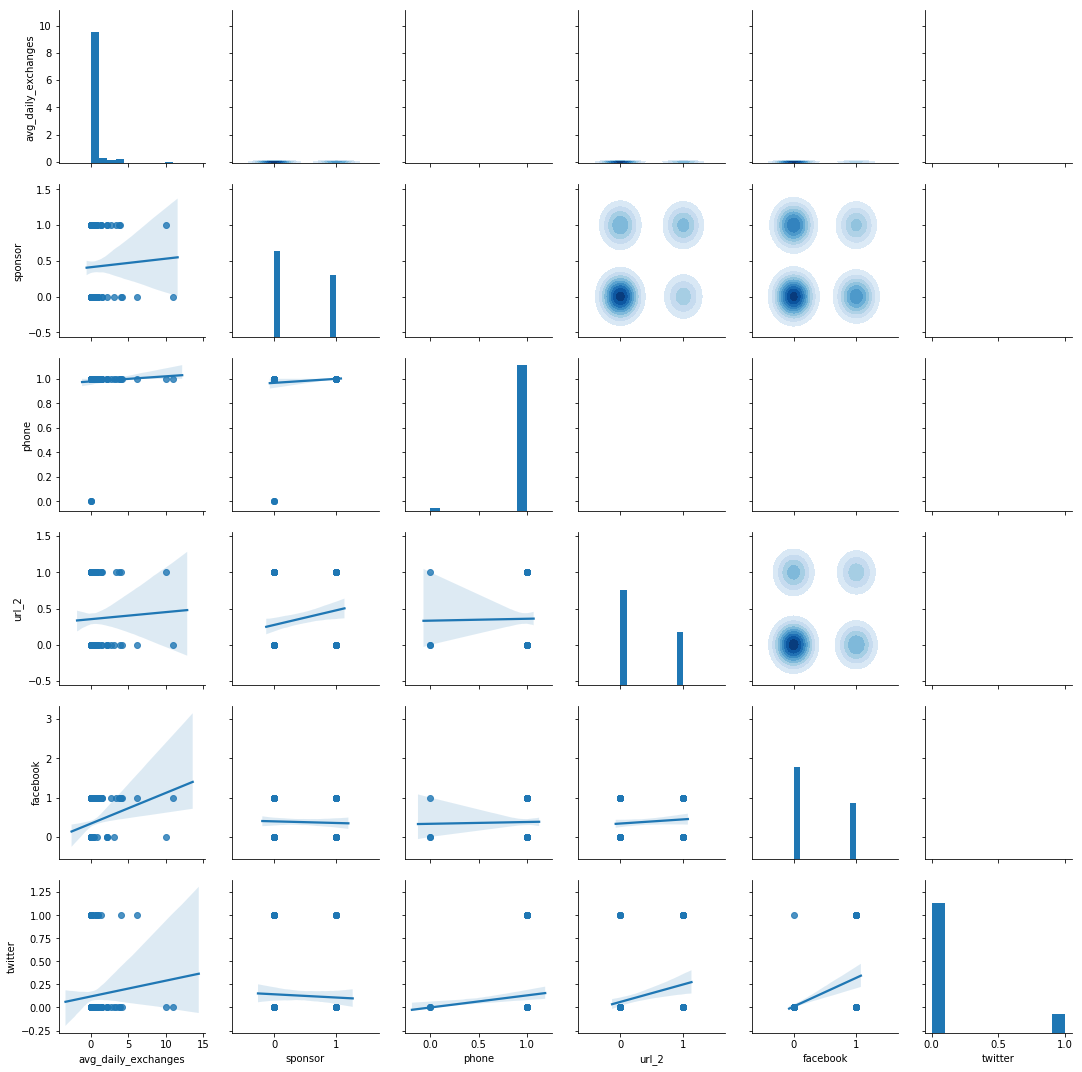

In [15]:
get_pairgrid(data[['avg_daily_exchanges', 'sponsor', 'phone', 'url_2', 'facebook', 'twitter']])

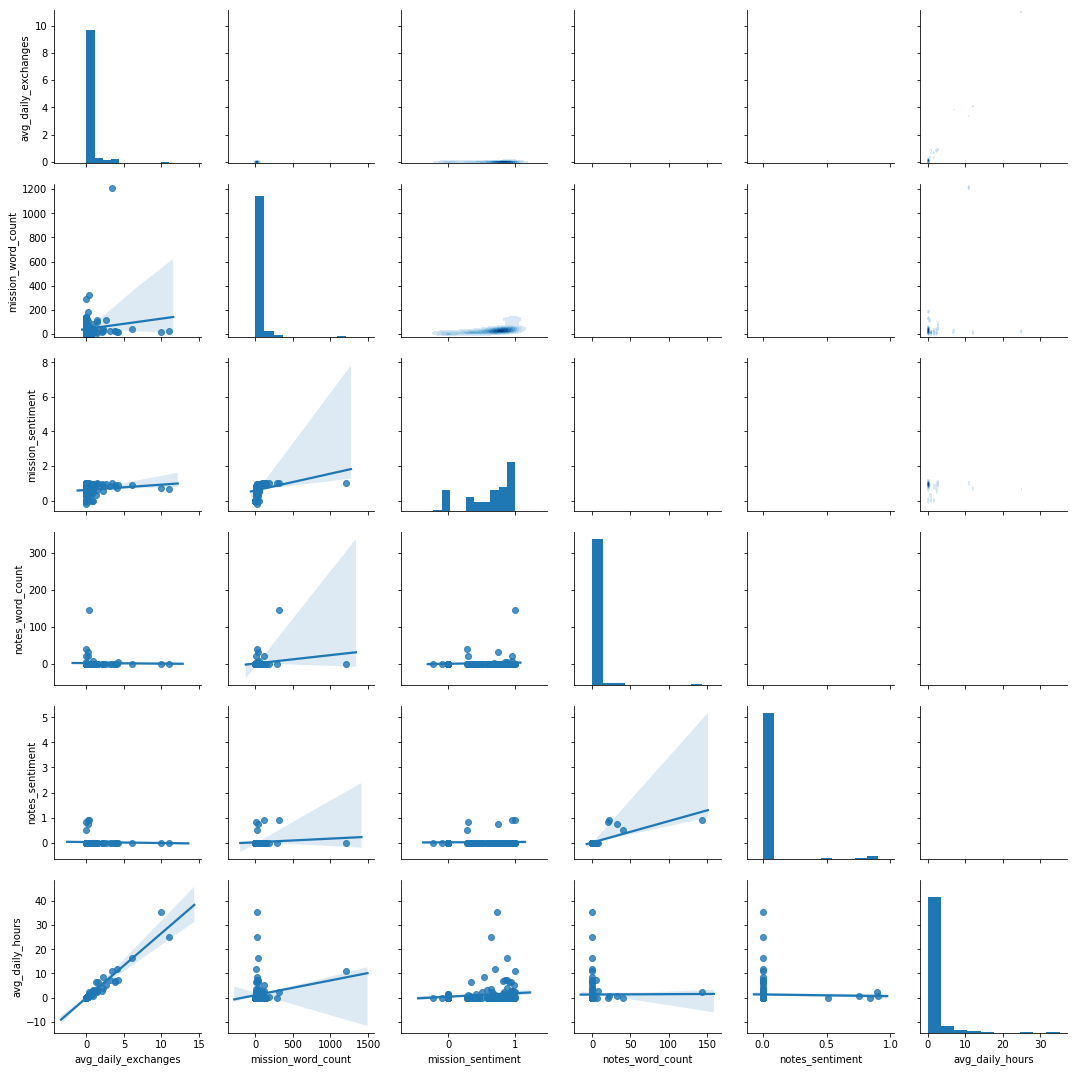

In [16]:
get_pairgrid(data[['avg_daily_exchanges', 'mission_word_count', 'mission_sentiment', 'notes_word_count',
                   'notes_sentiment', 'avg_daily_hours']])

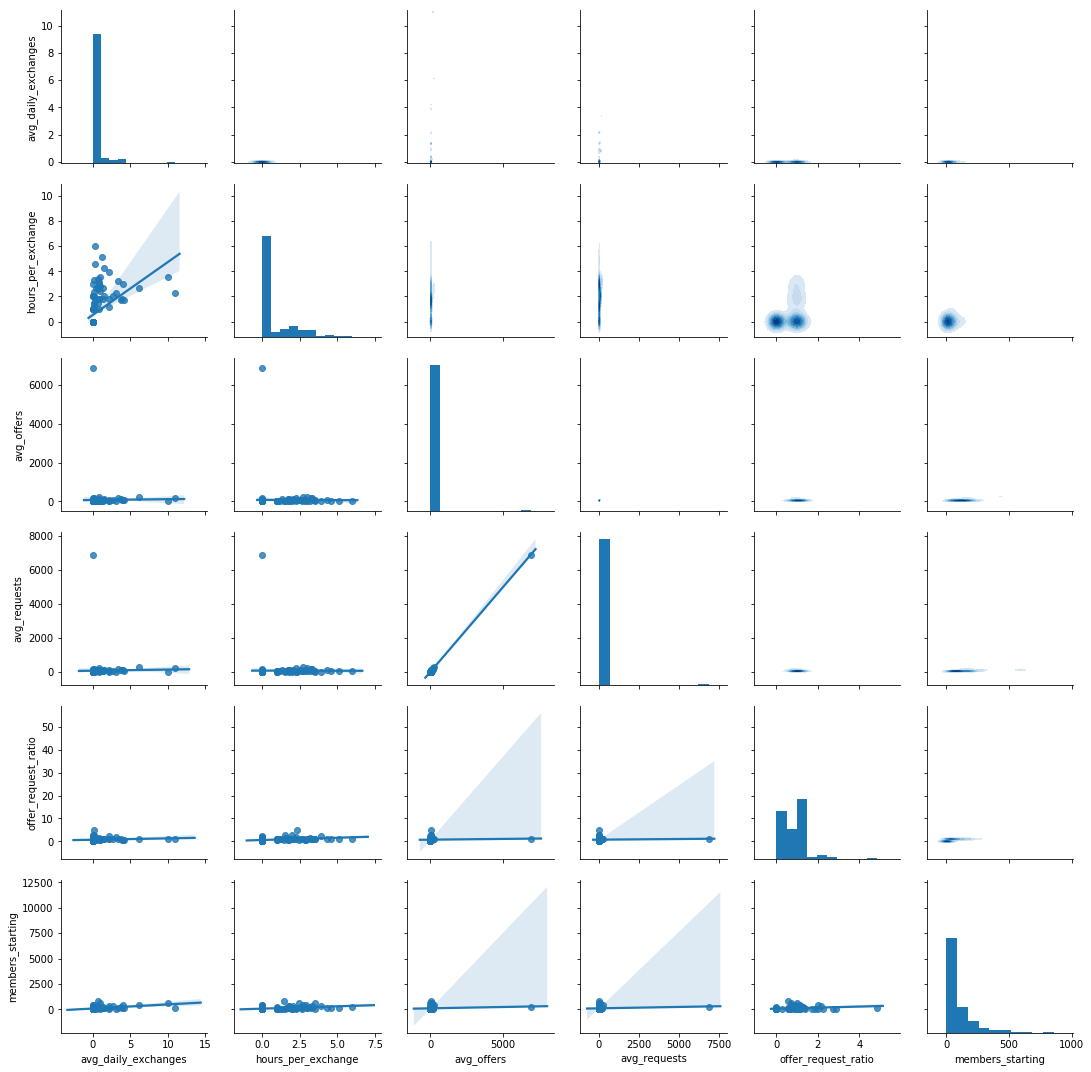

In [17]:
get_pairgrid(data[['avg_daily_exchanges', 'hours_per_exchange', 'avg_offers', 'avg_requests',
                   'offer_request_ratio', 'members_starting']])

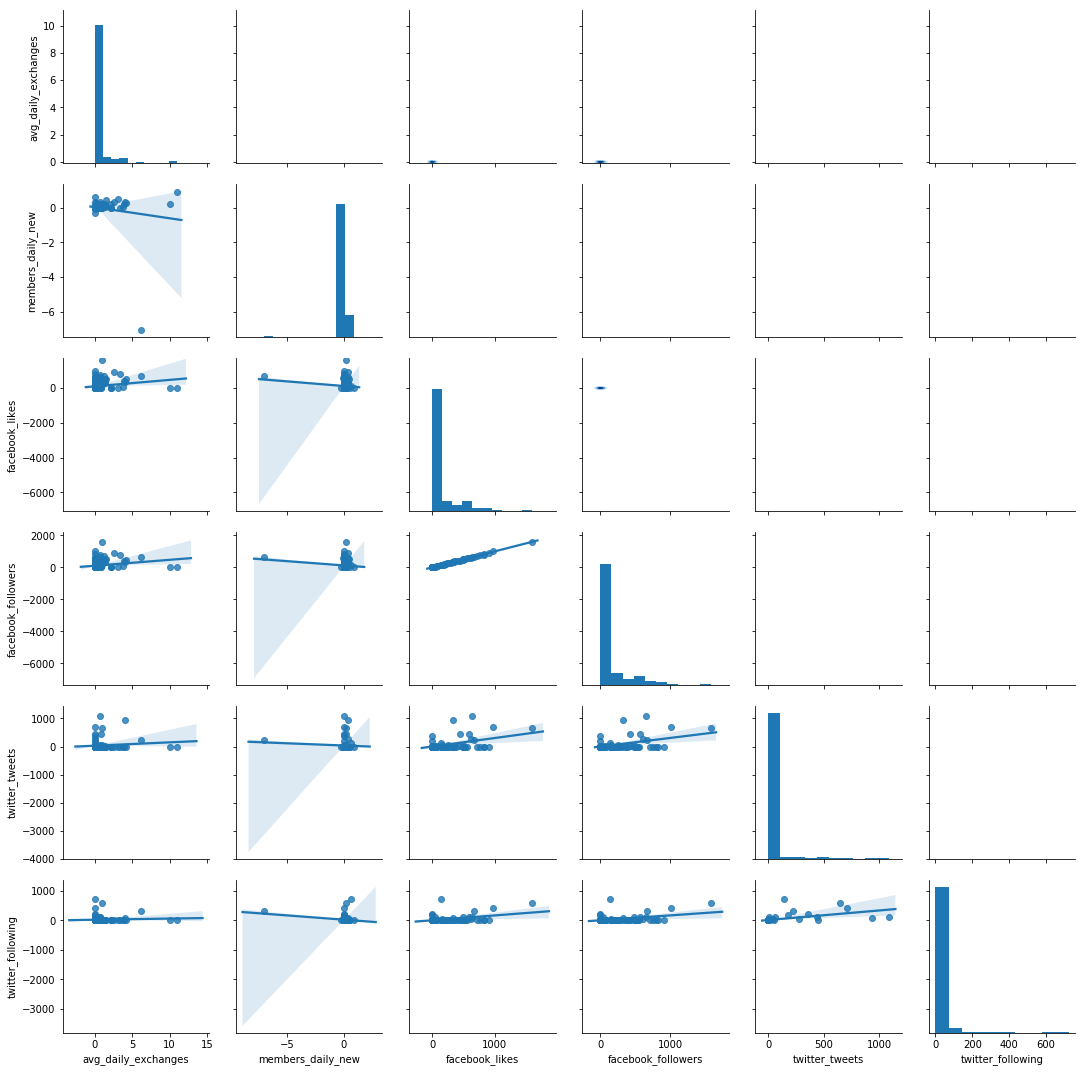

In [18]:
get_pairgrid(data[['avg_daily_exchanges', 'members_daily_new', 'facebook_likes', 'facebook_followers',
                   'twitter_tweets', 'twitter_following']])

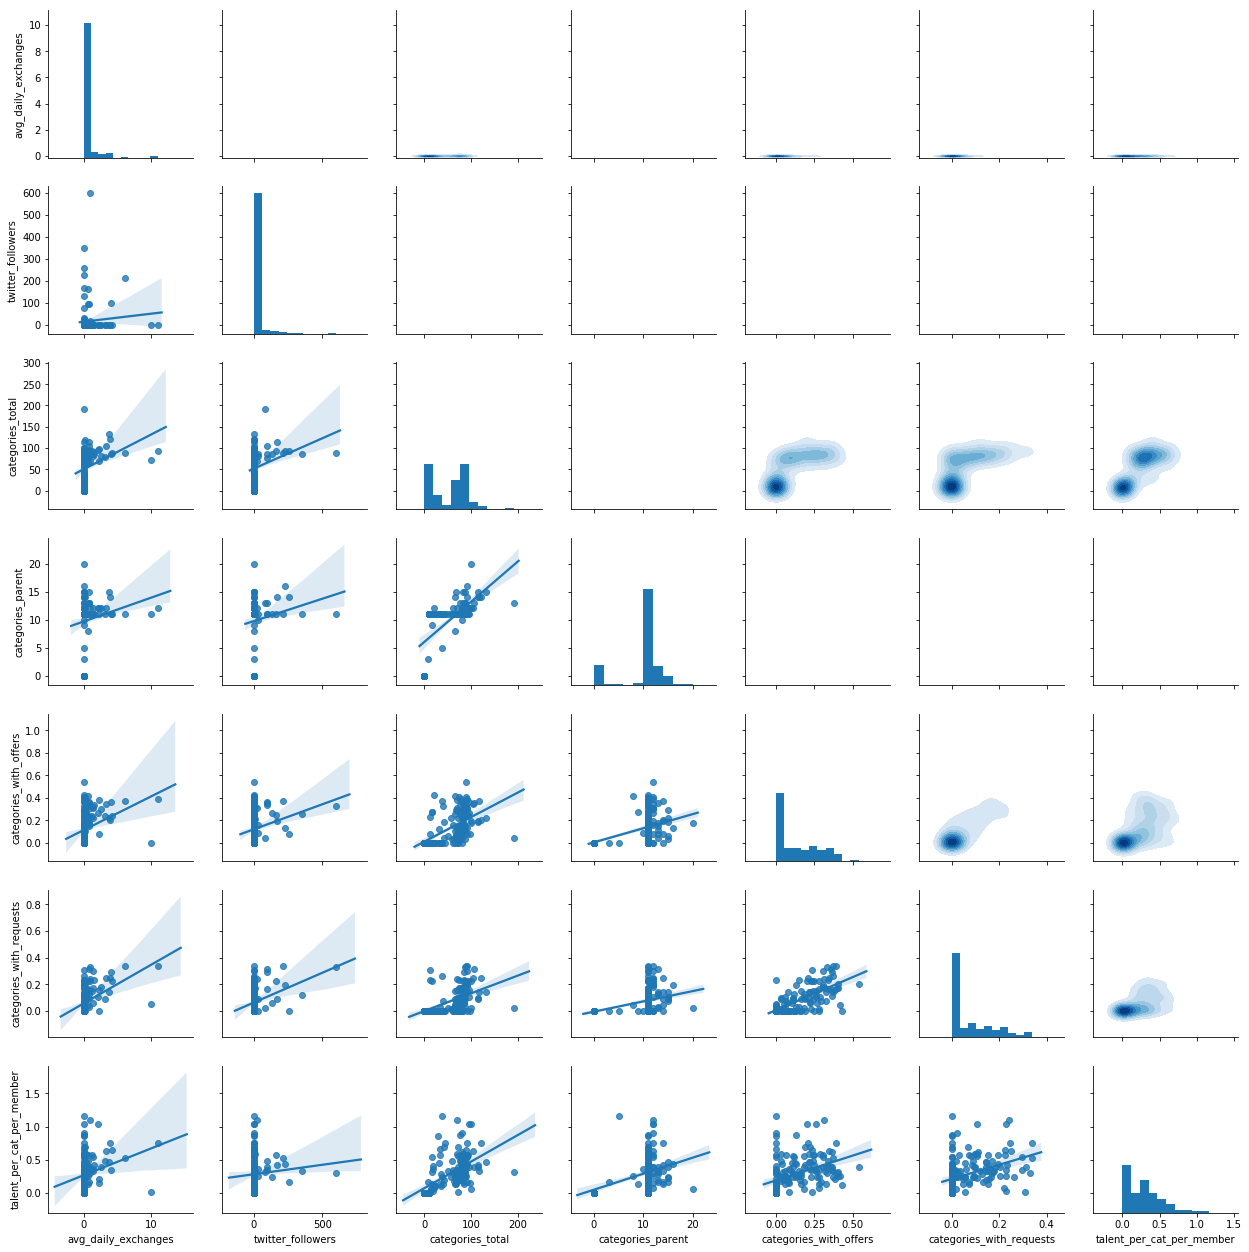

In [19]:
get_pairgrid(data[['avg_daily_exchanges', 'twitter_followers', 'categories_total', 'categories_parent',
                   'categories_with_offers', 'categories_with_requests', 'talent_per_cat_per_member']])

### Boxplots of data for ALL vs ACTIVE timebanks

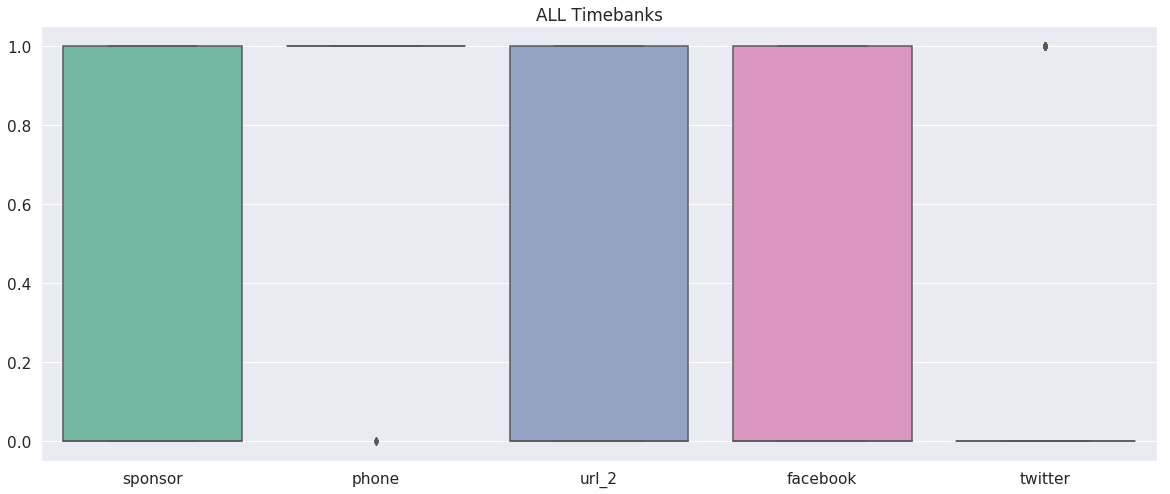

In [20]:
get_boxplot(data[['sponsor', 'phone', 'url_2', 'facebook', 'twitter']])

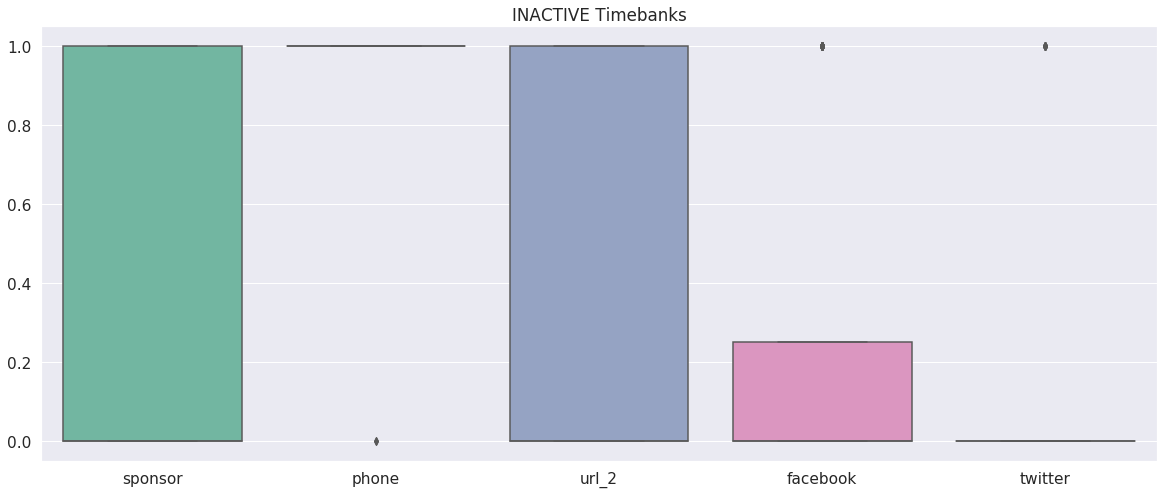

In [21]:
get_boxplot(data_inactive[['sponsor', 'phone', 'url_2', 'facebook', 'twitter']])

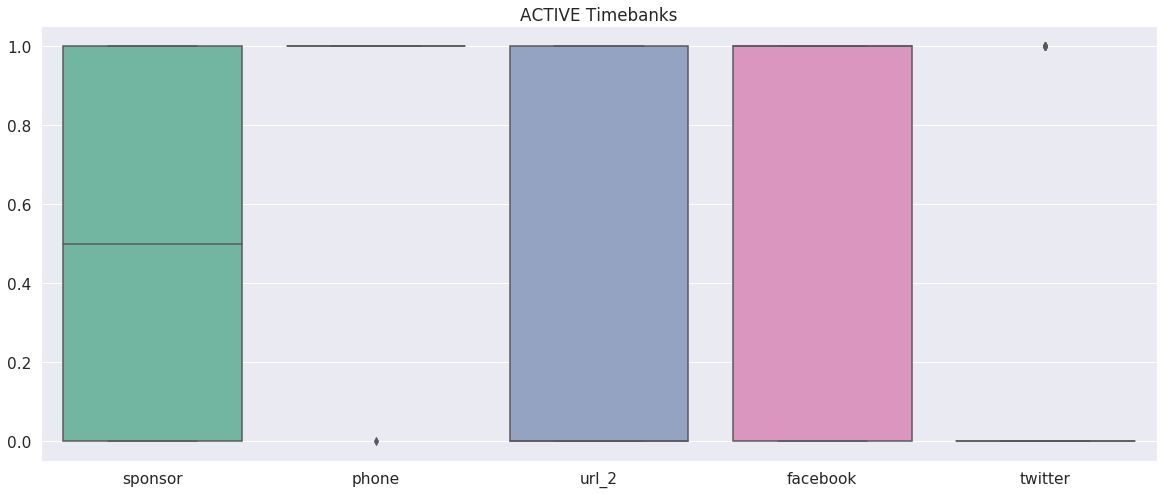

In [22]:
get_boxplot(data_active[['sponsor', 'phone', 'url_2', 'facebook', 'twitter']])

----

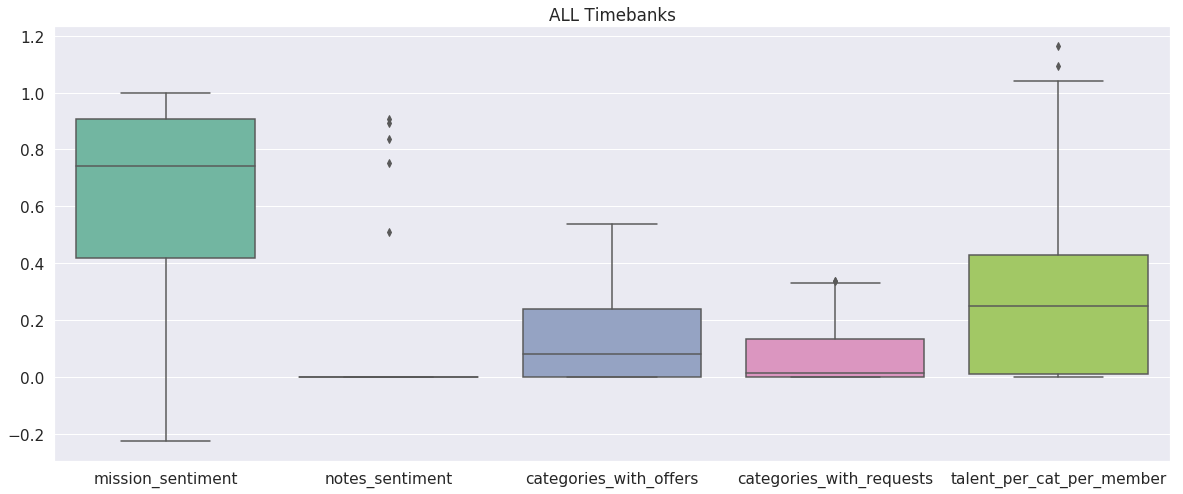

In [23]:
get_boxplot(data[['mission_sentiment', 'notes_sentiment', 'categories_with_offers', 'categories_with_requests',
                 'talent_per_cat_per_member']])

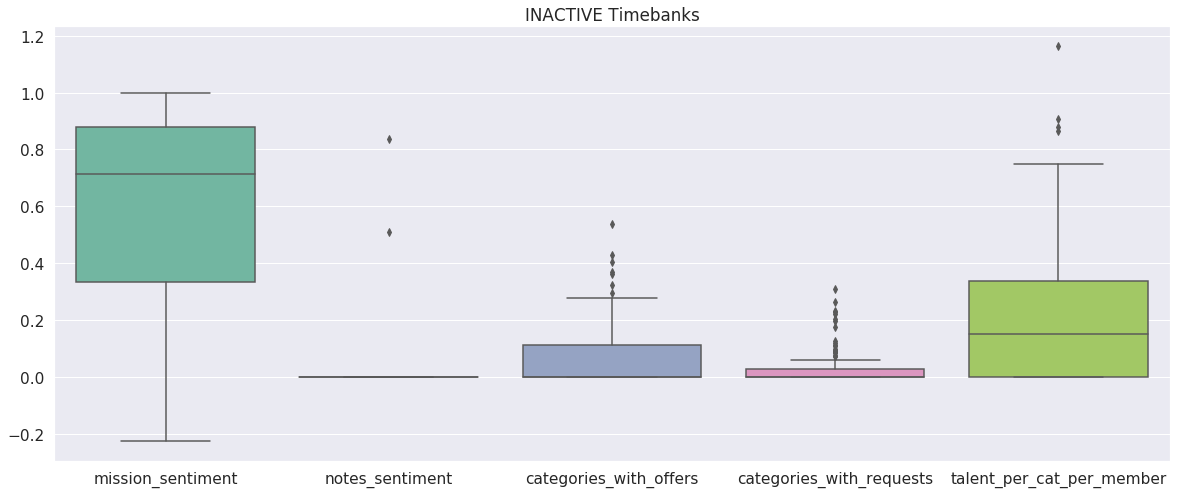

In [24]:
get_boxplot(data_inactive[['mission_sentiment', 'notes_sentiment', 'categories_with_offers', 'categories_with_requests',
                 'talent_per_cat_per_member']])

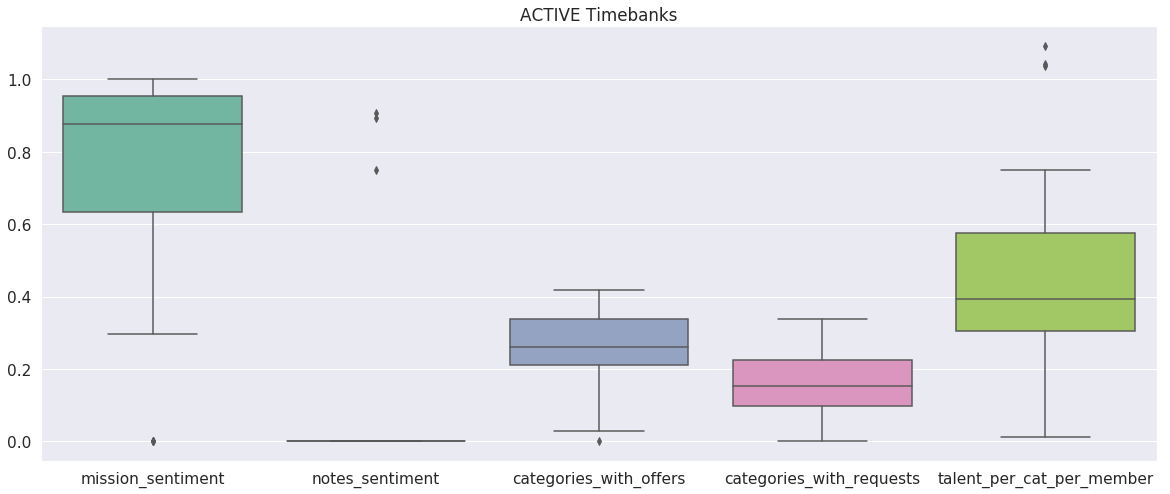

In [25]:
get_boxplot(data_active[['mission_sentiment', 'notes_sentiment', 'categories_with_offers', 'categories_with_requests',
                 'talent_per_cat_per_member']])

----

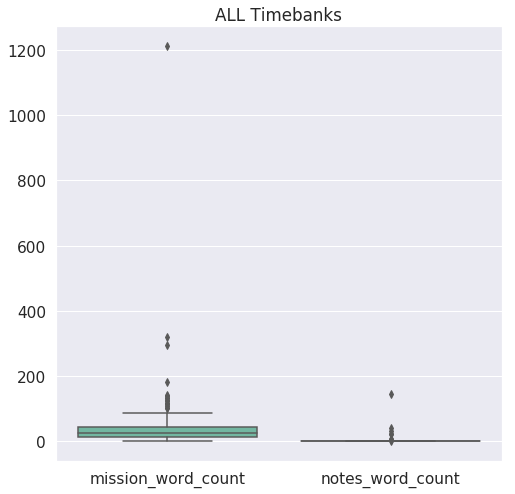

In [26]:
get_boxplot(data[['mission_word_count', 'notes_word_count']])

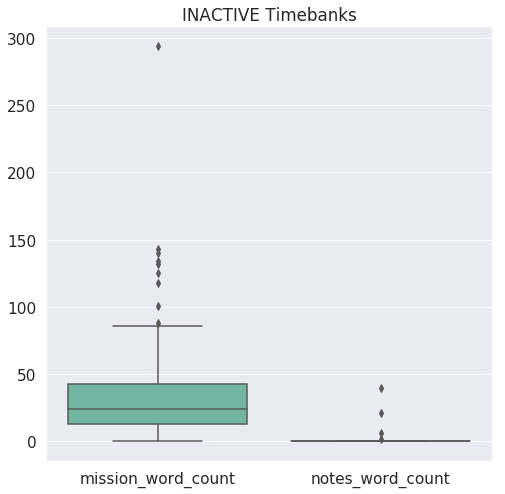

In [27]:
get_boxplot(data_inactive[['mission_word_count', 'notes_word_count']])

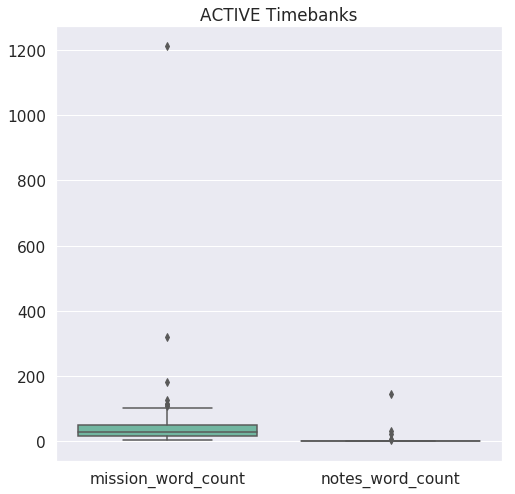

In [28]:
get_boxplot(data_active[['mission_word_count', 'notes_word_count']])

----

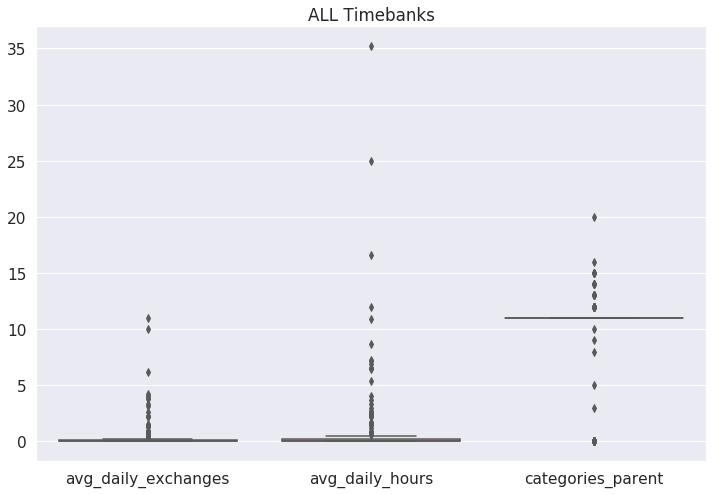

In [29]:
get_boxplot(data[['avg_daily_exchanges', 'avg_daily_hours', 'categories_parent']])

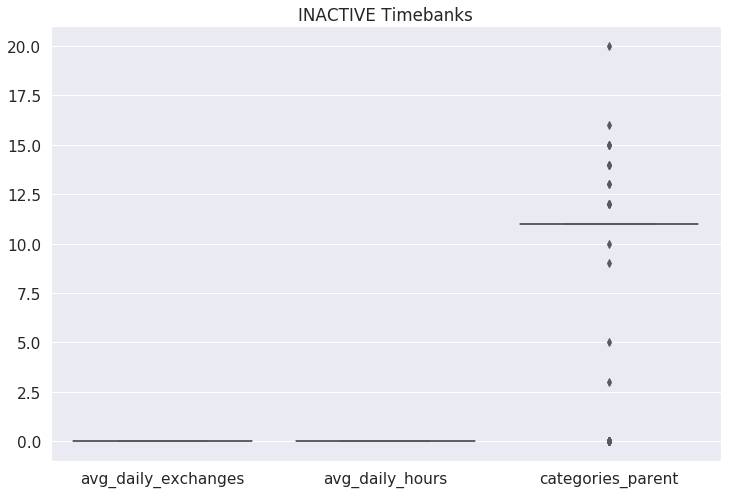

In [30]:
get_boxplot(data_inactive[['avg_daily_exchanges', 'avg_daily_hours', 'categories_parent']])

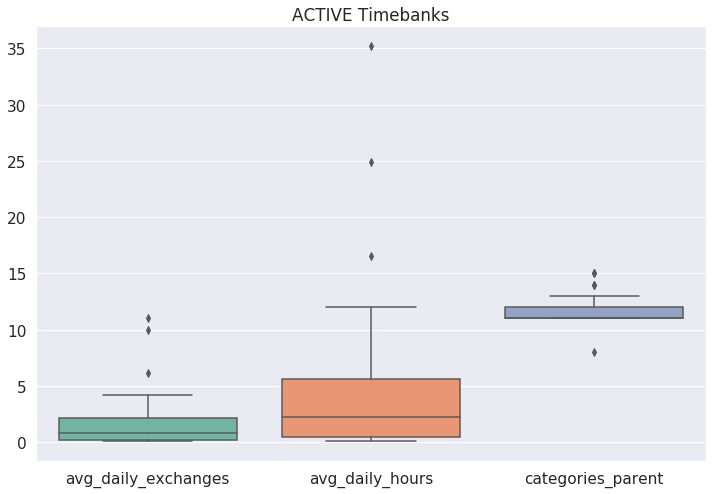

In [31]:
get_boxplot(data_active[['avg_daily_exchanges', 'avg_daily_hours', 'categories_parent']])

----

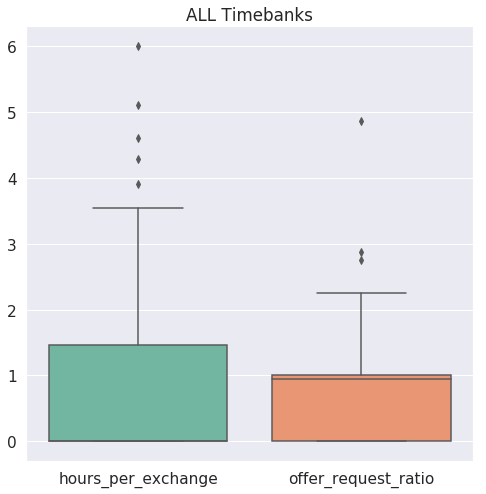

In [32]:
get_boxplot(data[['hours_per_exchange', 'offer_request_ratio']])

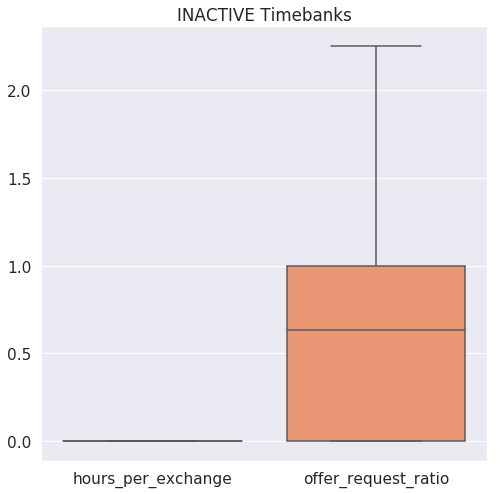

In [33]:
get_boxplot(data_inactive[['hours_per_exchange', 'offer_request_ratio']])

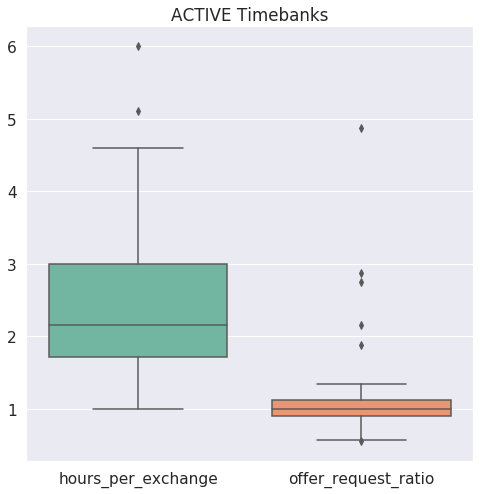

In [34]:
get_boxplot(data_active[['hours_per_exchange', 'offer_request_ratio']])

----

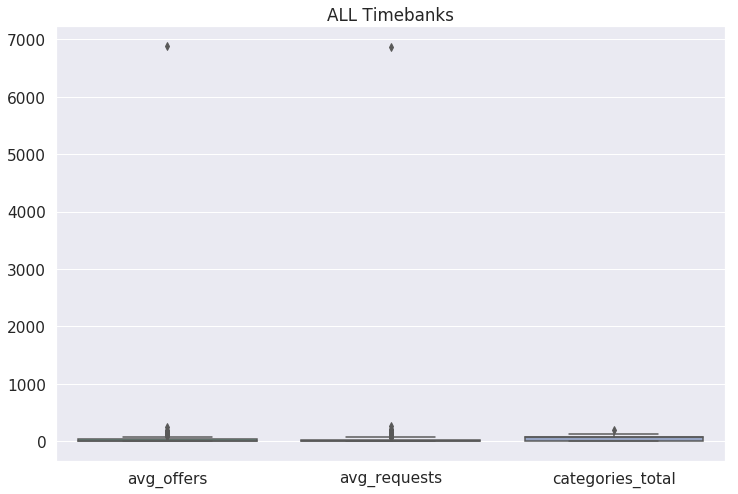

In [35]:
get_boxplot(data[['avg_offers', 'avg_requests', 'categories_total']])

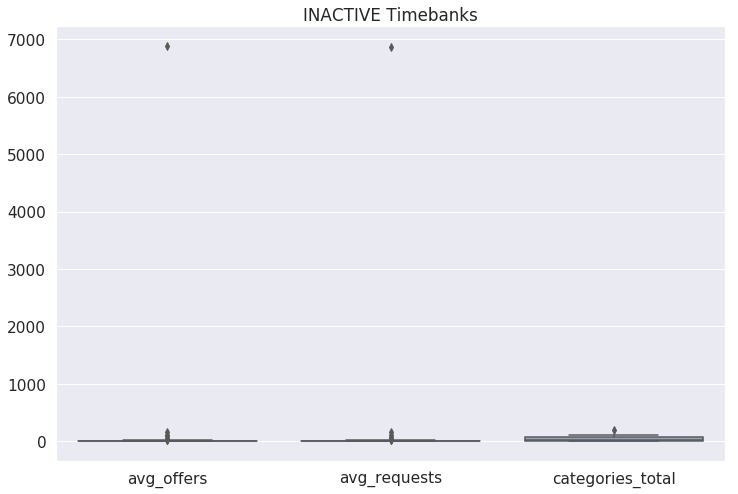

In [36]:
get_boxplot(data_inactive[['avg_offers', 'avg_requests', 'categories_total']])

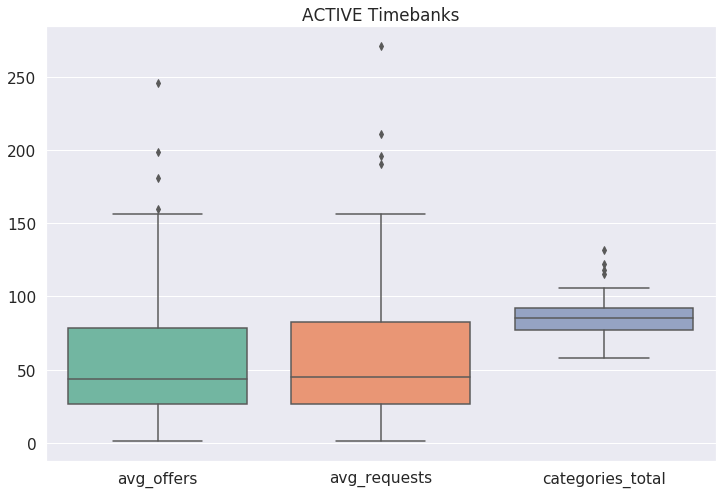

In [37]:
get_boxplot(data_active[['avg_offers', 'avg_requests', 'categories_total']])

----

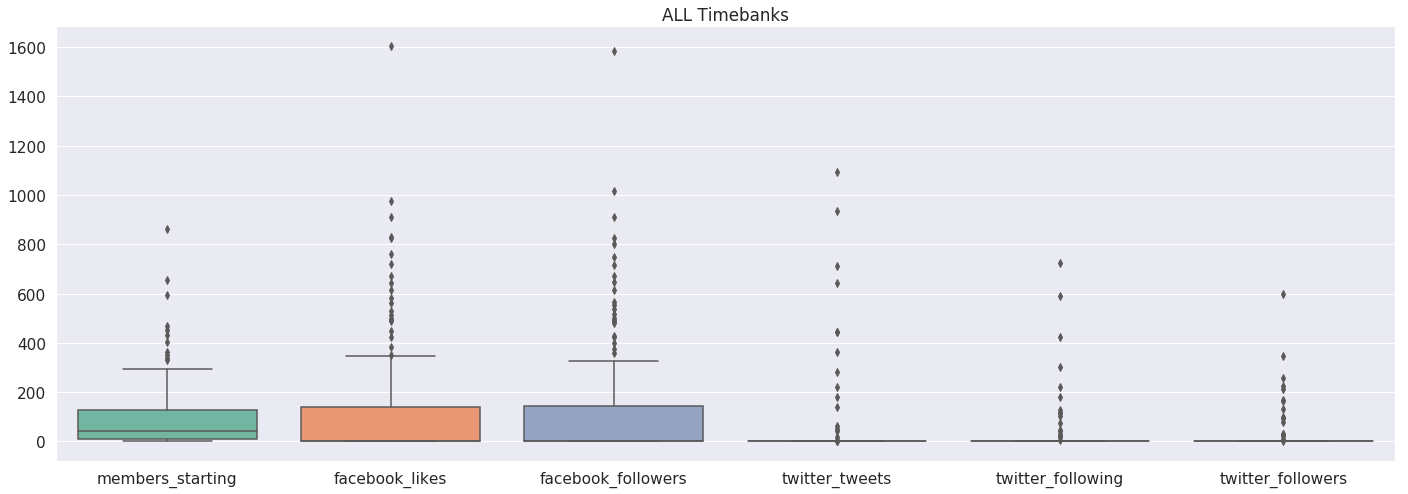

In [38]:
get_boxplot(data[['members_starting', 'facebook_likes', 'facebook_followers', 'twitter_tweets',
                        'twitter_following', 'twitter_followers']])

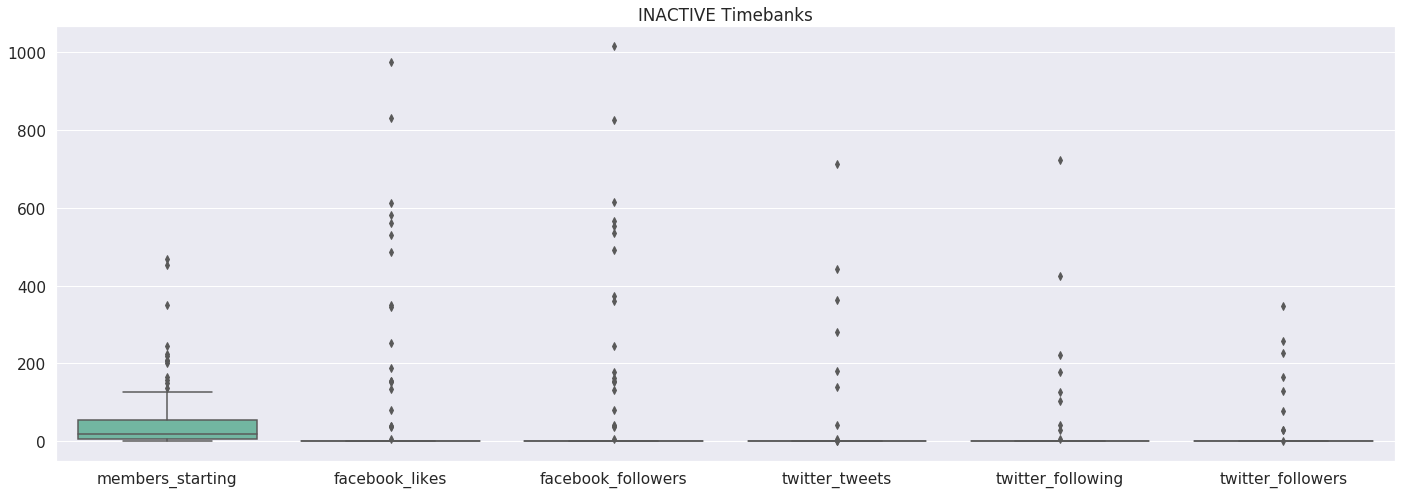

In [39]:
get_boxplot(data_inactive[['members_starting', 'facebook_likes', 'facebook_followers', 'twitter_tweets',
                        'twitter_following', 'twitter_followers']])

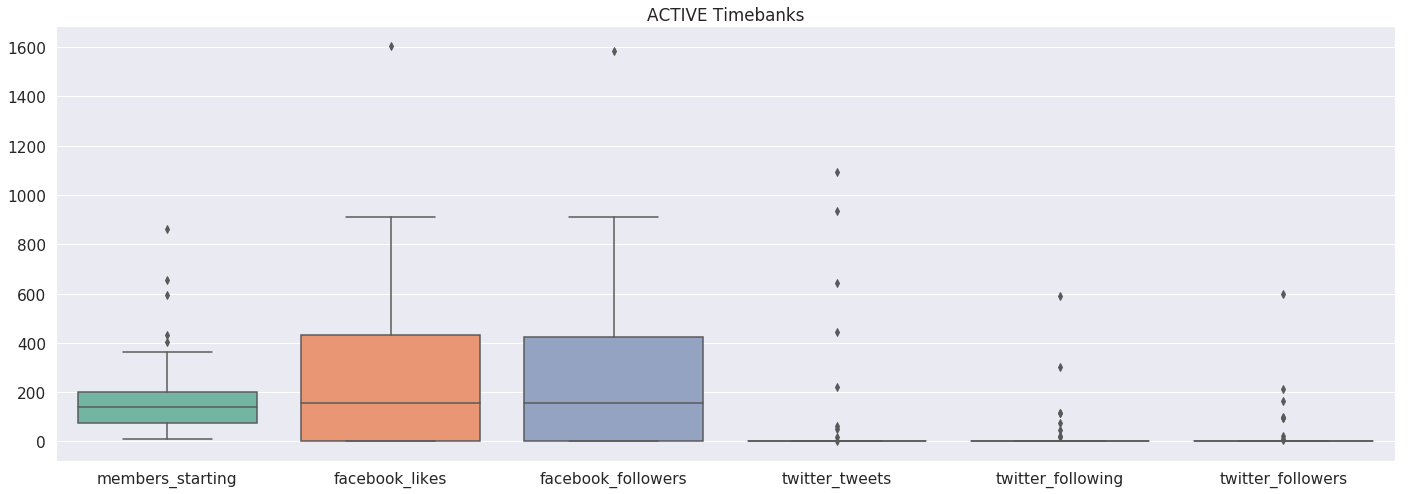

In [40]:
get_boxplot(data_active[['members_starting', 'facebook_likes', 'facebook_followers', 'twitter_tweets',
                        'twitter_following', 'twitter_followers']])

----

### Correlation heatmaps

**Correlation of ALL data to `ave_daily_exchanges`**

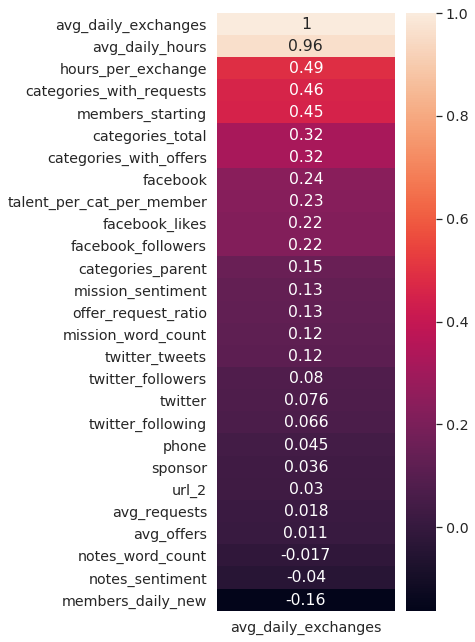

In [41]:
get_heatmap(data)

**Correlation of data for ACTIVE timebanks only to `ave_daily_exchanges`**

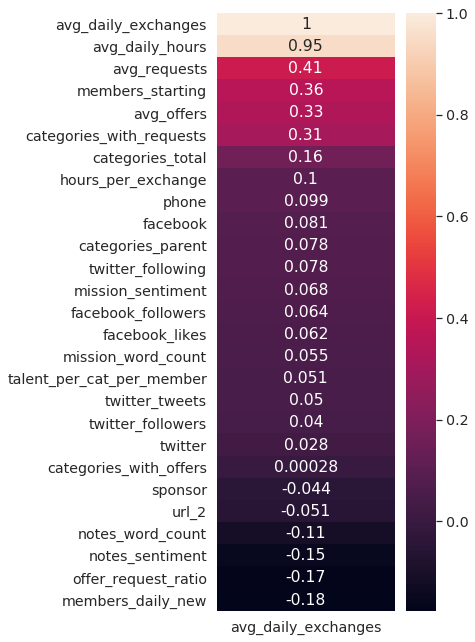

In [42]:
get_heatmap(data_active)